In [1]:
import pandas as pd
df=pd.read_csv('laptopData.csv')
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Memory'] = (df['Memory'].str.upper().replace({'TB': '000', 'FLASH STORAGE': 'SSD'}, regex=True).str.extractall(r'(\d+)').unstack().fillna(0).astype(int).sum(axis=1))
df.isna().sum()
df.drop_duplicates(inplace=True)

df.dropna(inplace=True)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False).replace('?', '0').astype(float)




df.drop(columns=['Unnamed: 0'],inplace=True)
df.to_csv('clean_laptopData.csv',index=False)

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


Text(0, 0.5, 'Frequency')

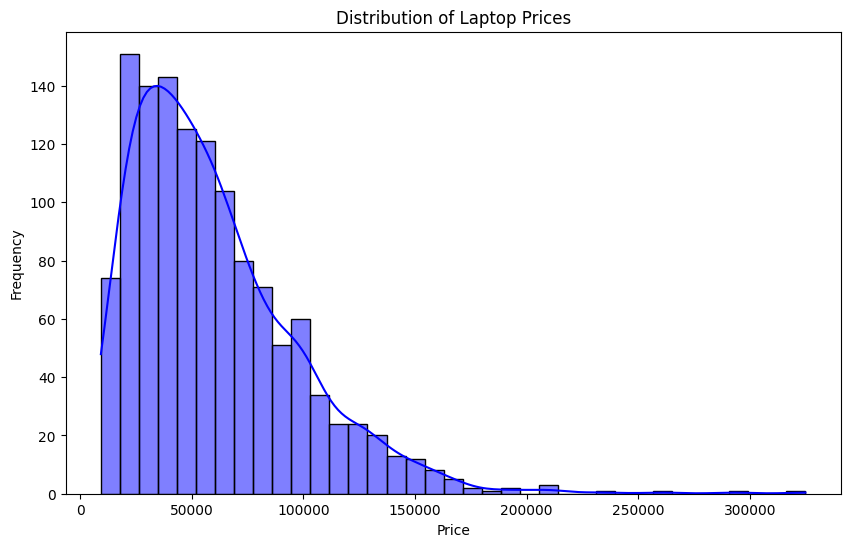

In [6]:
dt=pd.read_csv('clean_laptopData.csv')
print(dt.isna().sum())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(dt['Price'], kde=True, color='blue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

C:\Users\miste\AppData\Local\Temp\ipykernel_19372\1257020900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt['Company'],y=dt['Price'],palette='viridis')


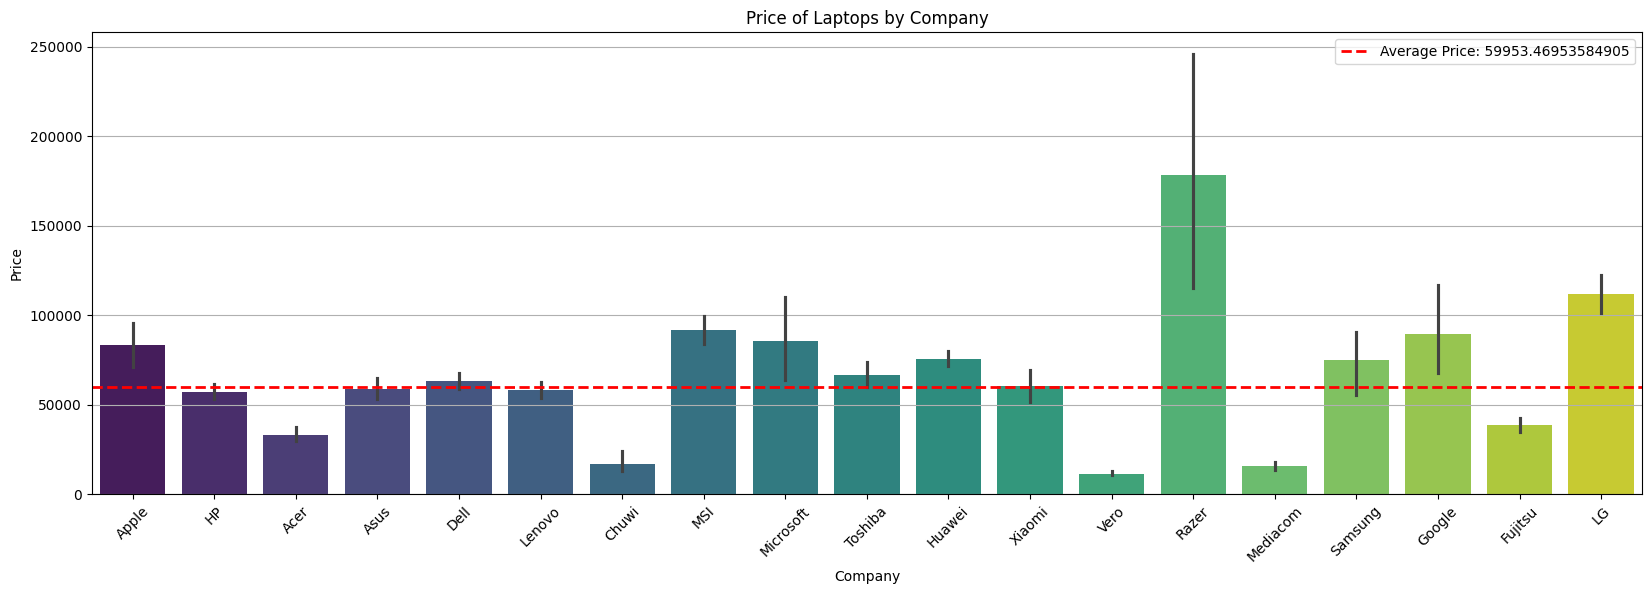

In [17]:

plt.figure(figsize=(20,6))
sns.barplot(x=dt['Company'],y=dt['Price'],palette='viridis')
avg=dt['Price'].mean()
plt.axhline(avg, color='red', linestyle='--', linewidth=2, label=f'Average Price: {avg}')
plt.xticks(rotation=45)
plt.title('Price of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.grid(True, axis='y')
plt.legend()

In [20]:
dt.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


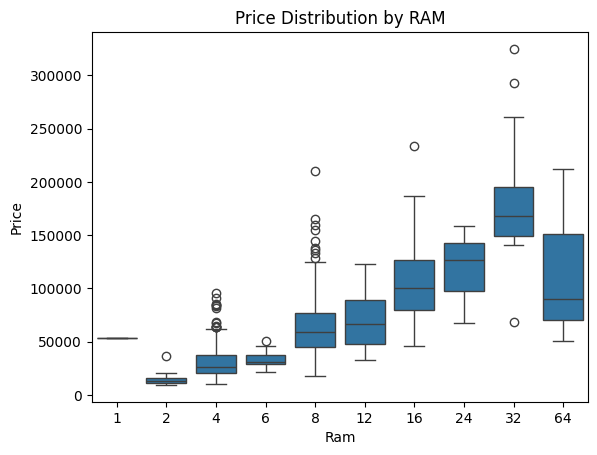

In [21]:
sns.boxplot(x='Ram', y='Price', data=dt)
plt.title('Price Distribution by RAM')
plt.show()


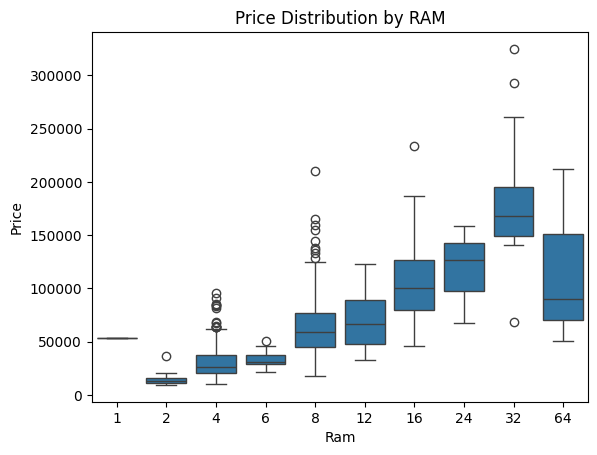

In [22]:
sns.boxplot(x='Ram', y='Price', data=dt)
plt.title('Price Distribution by RAM')
plt.show()


<Axes: >

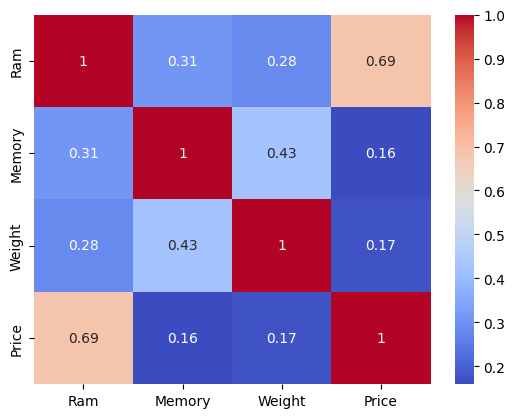

In [4]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [18]:

import joblib
x=dt[['Ram','Weight','Memory']]
y=dt['Price']
from sklearn.model_selection import train_test_split as tts
x_tr,x_ts,y_tr,y_ts=tts(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression as LR
model=LR()
model.fit(x_tr,y_tr)
y_pred=model.predict(x_ts)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_ts, y_pred)
mse = mean_squared_error(y_ts, y_pred)
r2 = r2_score(y_ts, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
joblib.dump(model,'Linear_model.pkl')


Mean Absolute Error: 18539.71716154132
Mean Squared Error: 556471375.4857441
R-squared: 0.4877391702045015


['Linear_model.pkl']

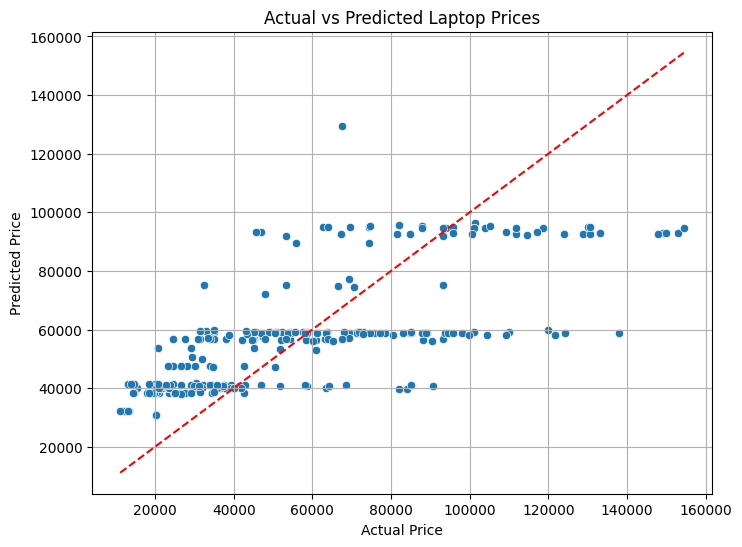

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_ts, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.plot([y_ts.min(), y_ts.max()], [y_ts.min(), y_ts.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()



 Decision Tree:
MAE: 17153.610163454272
MSE: 787994821.7994641
R2 Score: 0.2746098019198284


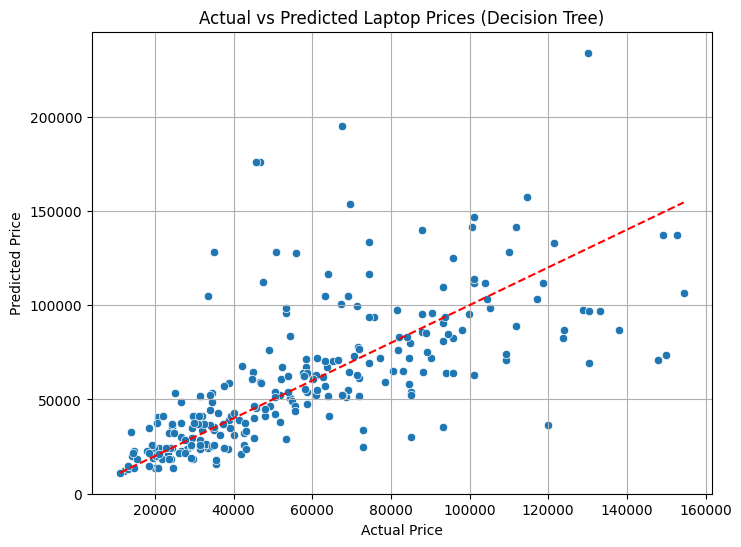

['Decsion_tree_model.pkl']

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_tr, y_tr)
y_pred_dt = dt_model.predict(x_ts)

print("\n Decision Tree:")
print("MAE:", mean_absolute_error(y_ts, y_pred_dt))
print("MSE:", mean_squared_error(y_ts, y_pred_dt))
print("R2 Score:", r2_score(y_ts, y_pred_dt))


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_ts, y=y_pred_dt)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices (Decision Tree)')
plt.plot([y_ts.min(), y_ts.max()], [y_ts.min(), y_ts.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()

joblib.dump(dt_model,'Decsion_tree_model.pkl')


 Random Forest:
MAE: 14405.083929776538
MSE: 479124886.7051339
R2 Score: 0.5589406340532717


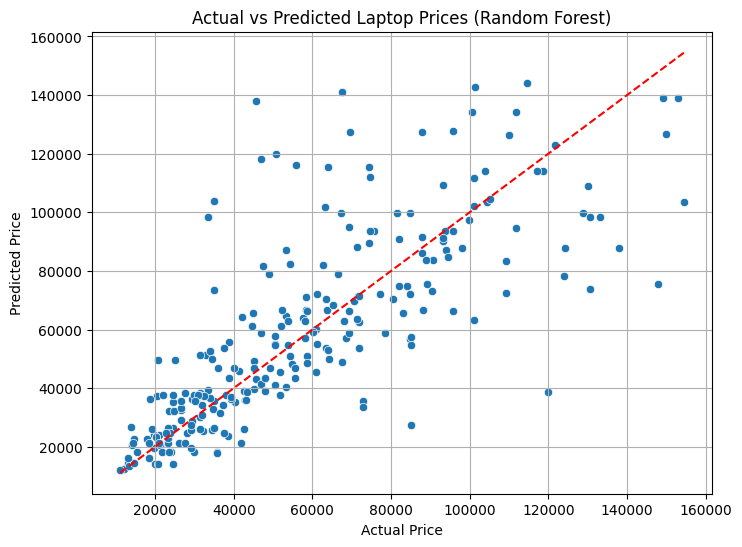

['Random_forest_model.pkl']

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_tr, y_tr)
y_pred_rf = rf_model.predict(x_ts)
print("\n Random Forest:")
print("MAE:", mean_absolute_error(y_ts, y_pred_rf))
print("MSE:", mean_squared_error(y_ts, y_pred_rf))
print("R2 Score:", r2_score(y_ts, y_pred_rf))
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_ts,y=y_pred_rf)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices (Random Forest)')
plt.plot([y_ts.min(),y_ts.max()], [y_ts.min(), y_ts.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()
joblib.dump(y_ts,'y_test.pkl')
joblib.dump(x_ts,'X_test.pkl')
joblib.dump(rf_model, 'Random_forest_model.pkl')


 Support Vector Regression:
MAE: 21644.811077910043
MSE: 774801343.7741003
R2 Score: 0.28675508431690055


['Support_vector_md.pkl']

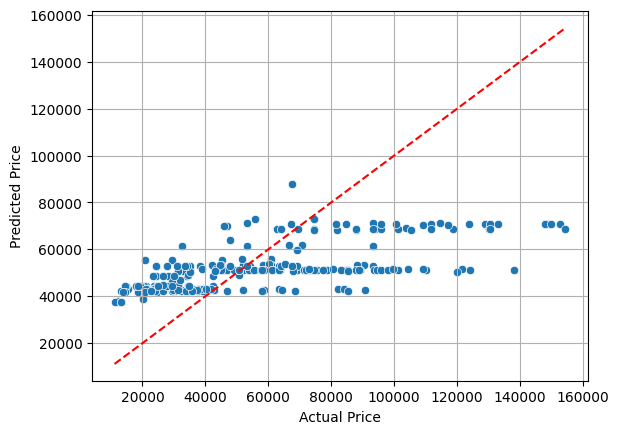

In [30]:
from sklearn.svm import SVR
svr= SVR(kernel='linear')
svr.fit(x_tr, y_tr)
y_pred_svr = svr.predict(x_ts)
print("\n Support Vector Regression:")
print("MAE:", mean_absolute_error(y_ts, y_pred_svr))
print("MSE:", mean_squared_error(y_ts, y_pred_svr))
print("R2 Score:", r2_score(y_ts, y_pred_svr))
sns.scatterplot(x=y_ts,y=y_pred_svr)
plt.plot([y_ts.min(),y_ts.max()],[y_ts.min(),y_ts.max()],color='red',linestyle='dashed')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

joblib.dump(svr,'Support_vector_md.pkl')


 Support Vector Regression:
MAE: 14280.198369882353
MSE: 434021408.73849076
R2 Score: 0.6004607302661046


['Knn_Model.pkl']

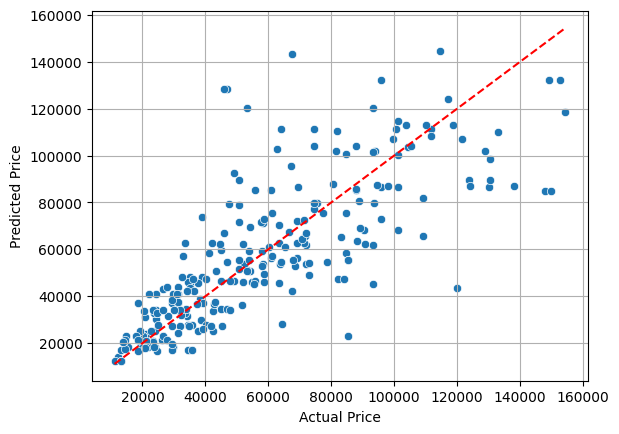

In [54]:
from sklearn.neighbors import KNeighborsRegressor
Knn=KNeighborsRegressor()
Knn.fit(x_tr,y_tr)
y_pred_Knn=Knn.predict(x_ts)
print("\n Support Vector Regression:")
print("MAE:", mean_absolute_error(y_ts, y_pred_Knn))
print("MSE:", mean_squared_error(y_ts, y_pred_Knn))
print('R2 Score:',r2_score(y_ts,y_pred_Knn))
sns.scatterplot(x=y_ts,y=y_pred_Knn)
plt.plot([y_ts.min(),y_ts.max()],[y_ts.min(),y_ts.max()],color='red',linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
joblib.dump(Knn,'Knn_Model.pkl')


C:\Users\miste\AppData\Local\Temp\ipykernel_19372\4015034174.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')


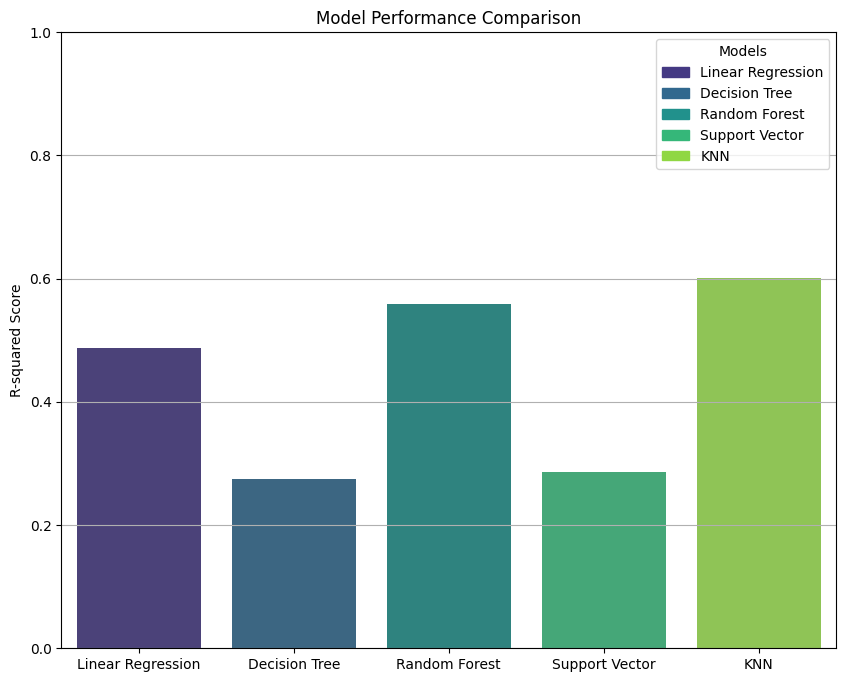

In [53]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest','Support Vector','KNN']
r2_scores = [
    r2_score(y_ts, y_pred),
    r2_score(y_ts, y_pred_dt),
    r2_score(y_ts, y_pred_rf),
    r2_score(y_ts,y_pred_svr),
    r2_score(y_ts,y_pred_Knn)
]

plt.figure(figsize=(10,8))
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.ylabel('R-squared Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.grid(True, axis='y')
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette('viridis', len(models))]
plt.legend(handles, models, title="Models", loc="upper right")
plt.show()
